# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [2]:
#importando bibliotecas

import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [6]:
#importando dataset e criando novas colunas 
tips = sns.load_dataset("tips") #importando dataset

# criando novas colunas - tip_pct (porcentagem da tip) 
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

#calculando a porcentagem da tip
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


<Axes: xlabel='net_bill', ylabel='tip'>

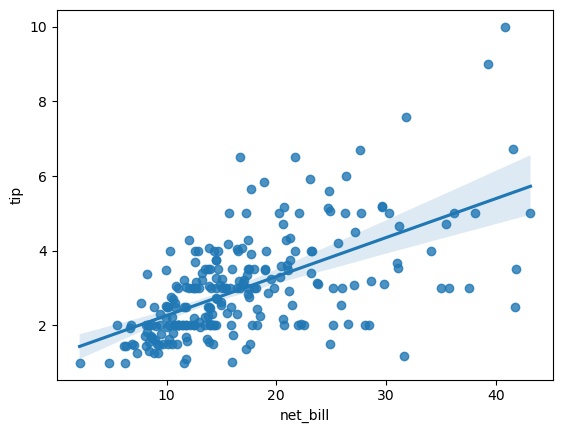

In [8]:
# Gráfico de dispersão
#y=vertical a valor da tip(quanto foi deixado de gorgeta
#x=horizontal valor da conta sem a tip (sem a gorgeta)
#foram considerados os valores de tip até 50% do valor da conta para evitar outliers
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5]) 

(0.0, 10.5)

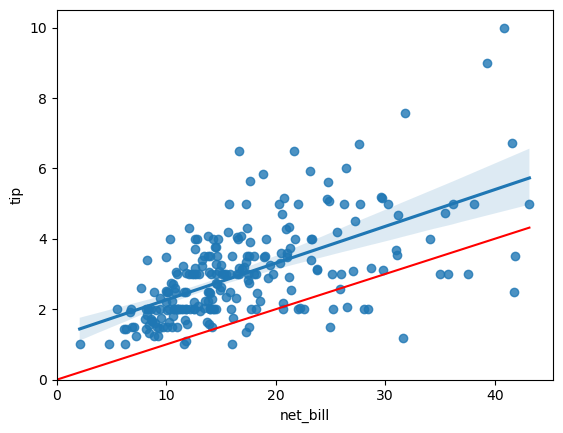

In [16]:
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5]) 

# Aqui ele cria uma linha imaginária onde a gorjeta é exatamente 10% da conta.
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)


### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [20]:
import statsmodels.formula.api as smf

#tip_pct depende de net_bill (o percentual da gorgeta depende do valor da conta)

modelo = smf.ols('tip_pct ~ net_bill', data=tips[tips['tip_pct'] < 0.5]).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           1.31e-12
Time:                        07:48:16   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.0

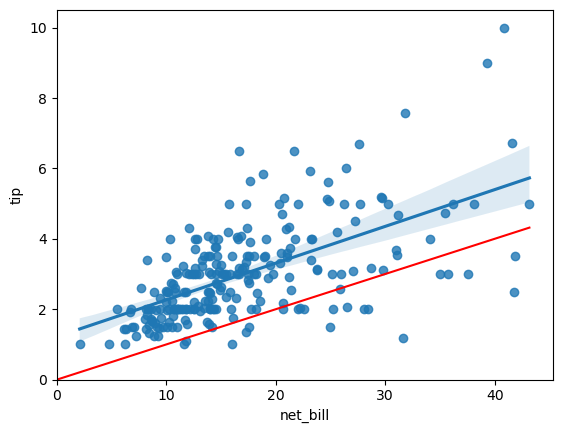

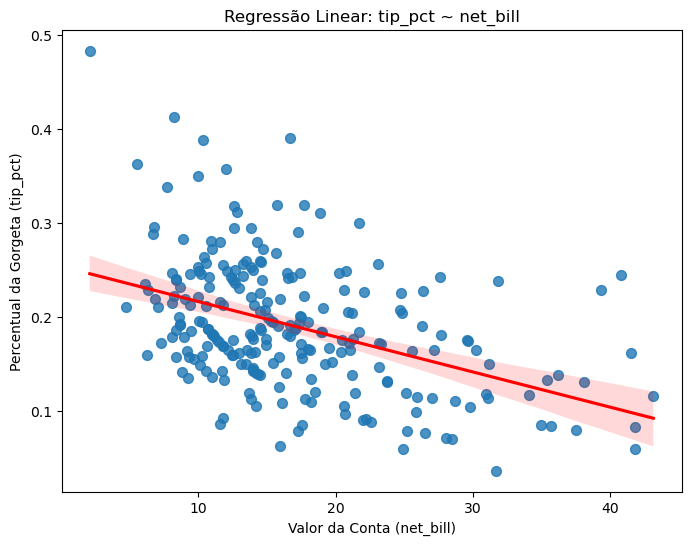

In [22]:
# Gráfico de dispersão
#y=vertical a valor da tip(quanto foi deixado de gorgeta
#x=horizontal valor da conta sem a tip (sem a gorgeta)
#foram considerados os valores de tip até 50% do valor da conta para evitar outliers
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5]) 

# Aqui ele cria uma linha imaginária onde a gorjeta é exatamente 10% da conta.
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)
plt.figure(figsize=(8, 6))
sns.regplot(x='net_bill', y='tip_pct', data=tips[tips['tip_pct'] < 0.5], scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Regressão Linear: tip_pct ~ net_bill')
plt.xlabel('Valor da Conta (net_bill)')
plt.ylabel('Percentual da Gorgeta (tip_pct)')
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Resposta_ Pela minha observação, ao comparar os dois gráficos, entendi que percentualmente quando a conta é menor as pessoas tendem a dar uma tip proporcionalmente maior, em relação ao valor da conta. E conforme o consumo aumenta, esse percentual diminui.

In [42]:
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

# Carregar o dataset
dicas = sns.load_dataset("tips")

# Criar colunas auxiliares
dicas['tip_pct'] = dicas['tip'] / (dicas['total_bill'] - dicas['tip'])
dicas['net_bill'] = dicas['total_bill'] - dicas['tip']

# Criar o modelo de regressão para prever o tip_pct com base no net_bill
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data=dicas).fit()


In [44]:
# Estimar o valor da gorjeta usando o percentual previsto pelo modelo
gorjetas_previstas = reg_tip_pct.fittedvalues * dicas.net_bill

# Calcular o R² para ver a qualidade da previsão
r2 = r2_score(dicas['tip'], gorjetas_previstas)
print(f"R² da previsão da gorjeta: {r2:.2f}")


R² da previsão da gorjeta: 0.11


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [51]:
#valor de tip que o modelo previu
pred_tip_pct = reg_tip_pct.fittedvalues

#transformando o valor previsto em valor absoluto
pred_tip = pred_tip_pct * dicas['net_bill']

# R² medindo o quanto o modelo conseguiu explicar a variação real da gorjeta com base na previsão. 
r2_tip = r2_score(dicas['tip'], pred_tip)
print(f"R² para previsão de gorjeta (tip): {r2_tip:.2f}")



R² para previsão de gorjeta (tip): 0.11


R_ Acredito que quando a gente prever "tip_pct ~ net_bill" podemos ter um valor ma